VCU Spotify Project - Predict Popularity of songs based on different variables using a Neural Network.  

https://colab.research.google.com/drive/1_vsG8uPQXcRBfIy8sfXoL5d9T6uScA6e?usp=sharing CLICK HERE TO VIEW ALL OUTPUTS -Nolan 

In [ ]:
!pip install scikeras

In [ ]:
from tensorflow.keras import backend as K
# import libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.random import set_seed
from random import seed
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

In [ ]:
# For Google Colab integration
from google.colab import drive
drive.mount('/content/drive')

# Define the correct file path for the songs dataset
file_path = '/content/drive/MyDrive/Infor648/Data/songs_utf.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


# Data Pre-Processing

In [ ]:
# Display the first 5 rows of the dataset
df.head()

,artist,song,song_name_len,duration_ms,explicit,year,popularity,hot,danceability,energy,...,valence,tempo,genre,pop,rock,hiphop,dance,folk,rnb,latin
0,Britney Spears,Oops!...I Did It Again,22.0,211160.0,False,2000.0,77.0,1.0,0.751,0.834,...,0.894,95.053,pop,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,blink-182,All The Small Things,20.0,167066.0,False,1999.0,79.0,1.0,0.434,0.897,...,0.684,148.726,"rock, pop",1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Faith Hill,Breathe,7.0,250546.0,False,1999.0,66.0,0.0,0.529,0.496,...,0.278,136.859,"pop, country",1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bon Jovi,It's My Life,12.0,224493.0,False,2000.0,78.0,1.0,0.551,0.913,...,0.544,119.992,"rock, metal",0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,*NSYNC,Bye Bye Bye,11.0,200560.0,False,2000.0,65.0,0.0,0.614,0.928,...,0.879,172.656,pop,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Summary statistics of numeric columns
df.describe()

,song_name_len,duration_ms,year,popularity,hot,danceability,energy,key,loudness,mode,...,liveness,valence,tempo,pop,rock,hiphop,dance,folk,rnb,latin
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,...,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,17.552667,234667.923333,2007.034000,59.414000,0.128000,0.659393,0.737019,5.365333,-5.434571,0.562000,...,0.187266,0.573458,119.884948,0.823333,0.134000,0.385333,0.158000,0.010667,0.264667,0.025333
std,11.541289,38723.131986,4.567722,19.346045,0.334201,0.142157,0.151874,3.587447,1.915075,0.496307,...,0.146814,0.221088,26.762101,0.381514,0.340766,0.486836,0.364863,0.102762,0.441303,0.157188
min,2.000000,127920.000000,1998.000000,0.000000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,...,0.023400,0.038100,60.019000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,209116.500000,2003.000000,56.000000,0.000000,0.568000,0.645750,2.000000,-6.452500,0.000000,...,0.086200,0.411000,98.551250,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,228973.000000,2007.000000,64.000000,0.000000,0.670000,0.754000,6.000000,-5.179000,1.000000,...,0.129000,0.584000,120.092500,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23.000000,254086.000000,2011.000000,71.000000,0.000000,0.758000,0.857250,8.000000,-4.142500,1.000000,...,0.256000,0.755250,133.126250,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,75.000000,484146.000000,2020.000000,89.000000,1.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,...,0.853000,0.973000,210.851000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# List of column names in the dataset
df.columns

Index(['artist', 'song', 'song_name_len', 'duration_ms', 'explicit', 'year',
       'popularity', 'hot', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'genre', 'pop', 'rock', 'hiphop', 'dance', 'folk',
       'rnb', 'latin'],
      dtype='object')

**Handling Missing Values**

In [ ]:
# Check for missing values in each column
display(df.isna().sum())

,0
artist,499
song,499
song_name_len,499
duration_ms,499
explicit,499
year,499
popularity,499
hot,499
danceability,499
energy,499


In [ ]:
# Drop rows with missing values
df = df.dropna()

# Confirm the dataset no longer contains missing values
display(df.isna().sum())

,0
artist,0
song,0
song_name_len,0
duration_ms,0
explicit,0
year,0
popularity,0
hot,0
danceability,0
energy,0


**Identifying Categorical and Numeric Variables**

In [ ]:
# Identify numeric variables, excluding the target variable 'popularity'
numeric_variables = [col for col in df.columns if df[col].dtype != "object" and col != "popularity"]

# Display the list of numeric variables
numeric_variables

['song_name_len',
 'duration_ms',
 'year',
 'hot',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'pop',
 'rock',
 'hiphop',
 'dance',
 'folk',
 'rnb',
 'latin']

In [ ]:
# Identify categorical variables, excluding the target variable 'popularity'
categorical_variables = [col for col in df.columns if df[col].dtype == "O" and col != "popularity"]

# Display the list of categorical variables
categorical_variables

['artist', 'song', 'explicit', 'genre']

**Selecting target Variable**

In [ ]:
# Create a subset of the DataFrame with selected variables
df_sub = df[[
    "song_name_len", "duration_ms", "explicit", "popularity",
    "danceability", "energy", "key", "loudness", "speechiness",
    "acousticness", "instrumentalness", "liveness", "valence",
    "tempo", "pop", "rock", "hiphop", "dance", "folk", "rnb", "latin"
]]

# Display the first few rows of the subset DataFrame
df_sub.head()

,song_name_len,duration_ms,explicit,popularity,danceability,energy,key,loudness,speechiness,acousticness,...,liveness,valence,tempo,pop,rock,hiphop,dance,folk,rnb,latin
0,22.0,211160.0,False,77.0,0.751,0.834,1.0,-5.444,0.0437,0.3000,...,0.3550,0.894,95.053,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20.0,167066.0,False,79.0,0.434,0.897,0.0,-4.918,0.0488,0.0103,...,0.6120,0.684,148.726,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,7.0,250546.0,False,66.0,0.529,0.496,7.0,-9.007,0.0290,0.1730,...,0.2510,0.278,136.859,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12.0,224493.0,False,78.0,0.551,0.913,0.0,-4.063,0.0466,0.0263,...,0.3470,0.544,119.992,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,11.0,200560.0,False,65.0,0.614,0.928,8.0,-4.806,0.0516,0.0408,...,0.0845,0.879,172.656,1.0,0.0,0.0,0.0,0.0,0.0,0.0


**Encoding Variables**

In [ ]:
# Encode 'popularity' as 1 if greater than 50, otherwise 0
df_sub['popularity'] = df_sub['popularity'].apply(lambda x: 1 if x > 50 else 0)

# Print out a summary of the transformation
print("Popularity Encoding:")
print(df_sub['popularity'].value_counts())

Popularity Encoding:
popularity
1    1251
0     249
Name: count, dtype: int64


<ipython-input-14-f587401aa7a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['popularity'] = df_sub['popularity'].apply(lambda x: 1 if x > 50 else 0)


In [ ]:
# Encode 'explicit' column using LabelEncoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_sub['explicit'] = label_encoder.fit_transform(df_sub['explicit'])
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print out the mapping for 'explicit' encoding
print("Explicit Encoding:")
print(mapping)

Explicit Encoding:
{False: 0, True: 1}


<ipython-input-15-36d690774ded>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['explicit'] = label_encoder.fit_transform(df_sub['explicit'])


In [ ]:
df_sub['popularity'].value_counts()

,count
popularity,
1,1251
0,249


In [ ]:
df_sub['explicit'].value_counts()

,count
explicit,
0,1134
1,366


In [ ]:
# Display the first few rows of the subset DataFrame after encoding
df_sub.head()

,song_name_len,duration_ms,explicit,popularity,danceability,energy,key,loudness,speechiness,acousticness,...,liveness,valence,tempo,pop,rock,hiphop,dance,folk,rnb,latin
0,22.0,211160.0,0,1,0.751,0.834,1.0,-5.444,0.0437,0.3000,...,0.3550,0.894,95.053,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20.0,167066.0,0,1,0.434,0.897,0.0,-4.918,0.0488,0.0103,...,0.6120,0.684,148.726,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,7.0,250546.0,0,1,0.529,0.496,7.0,-9.007,0.0290,0.1730,...,0.2510,0.278,136.859,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12.0,224493.0,0,1,0.551,0.913,0.0,-4.063,0.0466,0.0263,...,0.3470,0.544,119.992,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,11.0,200560.0,0,1,0.614,0.928,8.0,-4.806,0.0516,0.0408,...,0.0845,0.879,172.656,1.0,0.0,0.0,0.0,0.0,0.0,0.0


One-hot encoding is not required because the chosen categorical variable(s) in the dataset are binary (having only two unique values), which can be directly mapped to 0 and 1 without losing information.

# Correlation

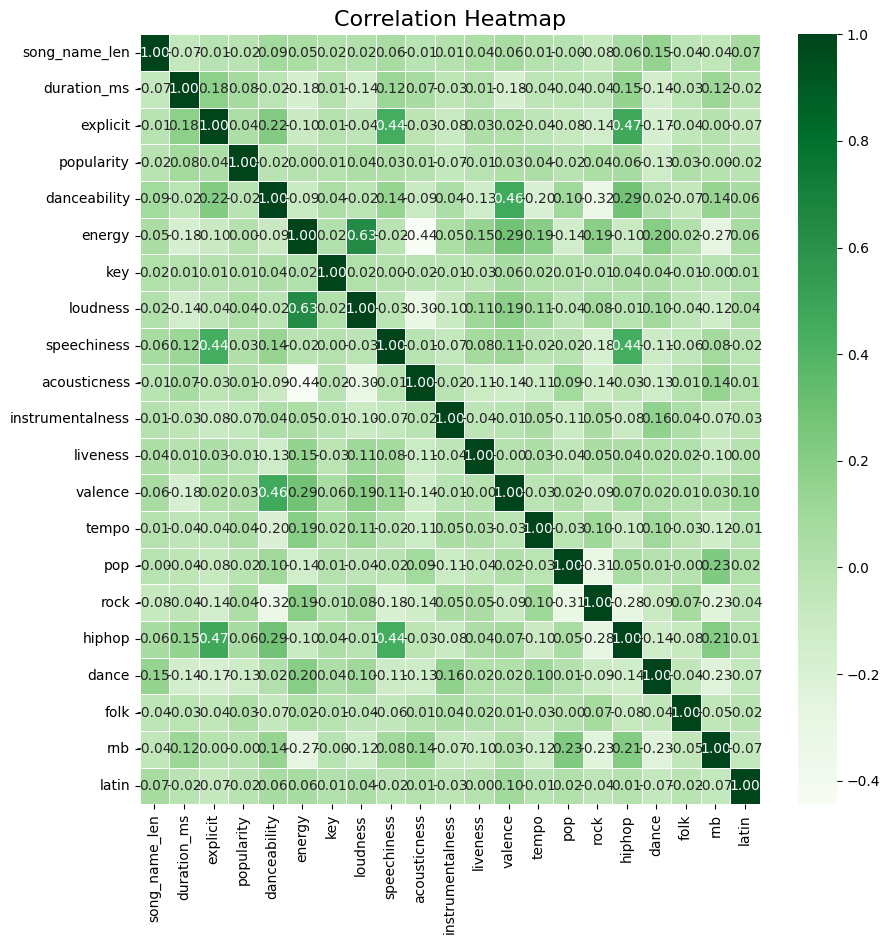

In [ ]:
# Compute the correlation matrix
corr_matrix = df_sub.corr()

# Plot the heatmap with Spotify-aligned color scheme
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, cmap='Greens', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# Splitting the Dataset into Training and Testing Sets

In [ ]:
X = df_sub.drop('popularity', axis=1)  # Drop the target column to get independent variables
y = df_sub['popularity']  # Select the target column directly as our y


# Split the dataset into training and testing sets test_size using 0.3: 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Display the shapes of the resulting datasets
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)

Training Features Shape: (1050, 20)
Testing Features Shape: (450, 20)
Training Target Shape: (1050,)
Testing Target Shape: (450,)


In [ ]:
X_train

,song_name_len,duration_ms,explicit,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,pop,rock,hiphop,dance,folk,rnb,latin
519,9.0,235533.0,1,0.862,0.648,4.0,-7.401,0.2510,0.04550,0.000000,0.0332,0.637,98.012,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1032,6.0,182306.0,0,0.706,0.751,9.0,-6.323,0.0708,0.17300,0.000000,0.1680,0.195,91.031,1.0,0.0,1.0,0.0,0.0,0.0,0.0
557,6.0,222653.0,0,0.489,0.798,1.0,-4.490,0.0316,0.00115,0.000003,0.1490,0.309,94.163,1.0,0.0,0.0,0.0,1.0,0.0,0.0
642,13.0,281320.0,1,0.618,0.746,10.0,-5.476,0.3520,0.05530,0.000000,0.2730,0.750,75.272,0.0,0.0,1.0,0.0,0.0,0.0,0.0
651,25.0,214706.0,0,0.450,0.883,7.0,-4.094,0.0524,0.00193,0.000000,0.2930,0.328,93.410,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,9.0,238360.0,0,0.808,0.721,1.0,-5.165,0.2130,0.19700,0.000000,0.2050,0.773,94.955,1.0,0.0,1.0,0.0,0.0,1.0,0.0
835,13.0,190453.0,0,0.692,0.911,9.0,-5.098,0.1770,0.01490,0.000073,0.1120,0.801,138.975,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1216,15.0,205640.0,1,0.728,0.858,9.0,-3.686,0.0609,0.04030,0.000004,0.0241,0.591,125.055,1.0,0.0,1.0,0.0,0.0,0.0,0.0
559,9.0,240040.0,1,0.838,0.594,4.0,-5.695,0.1130,0.17600,0.000000,0.0867,0.507,90.038,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
y_train

,popularity
519,1
1032,1
557,1
642,1
651,1
...,...
763,1
835,0
1216,1
559,1


In [ ]:
X_test

,song_name_len,duration_ms,explicit,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,pop,rock,hiphop,dance,folk,rnb,latin
471,9.0,316053.0,1,0.559,0.733,2.0,-5.659,0.1710,0.31400,0.000000,0.2840,0.611,145.115,1.0,0.0,1.0,0.0,0.0,1.0,0.0
9,22.0,307153.0,0,0.720,0.808,6.0,-5.627,0.0379,0.00793,0.029300,0.0634,0.869,126.041,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1499,15.0,222213.0,1,0.685,0.709,11.0,-3.578,0.0748,0.01320,0.000000,0.4520,0.504,93.047,1.0,0.0,0.0,0.0,0.0,0.0,0.0
54,34.0,227866.0,1,0.800,0.922,4.0,-5.125,0.2400,0.30100,0.000009,0.0352,0.801,98.631,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1411,36.0,203520.0,0,0.645,0.891,6.0,-2.505,0.0387,0.09320,0.000004,0.3790,0.568,124.915,1.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,28.0,230733.0,1,0.457,0.823,9.0,-4.760,0.3110,0.00144,0.000000,0.1080,0.578,192.205,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1202,35.0,250626.0,0,0.378,0.638,10.0,-5.576,0.0750,0.02000,0.000077,0.0849,0.735,184.086,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1323,19.0,221272.0,0,0.485,0.724,9.0,-4.633,0.0521,0.07360,0.000000,0.0631,0.433,128.045,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1164,8.0,195613.0,0,0.682,0.927,4.0,-2.915,0.0479,0.08430,0.000000,0.1490,0.744,101.019,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
y_test

,popularity
471,1
9,1
1499,0
54,1
1411,0
...,...
1331,1
1202,1
1323,1
1164,1


# Normalisation and Standardisation

In [ ]:
from sklearn.preprocessing import StandardScaler
#data standardization
# Ensure all features are numeric
X_train = X_train.select_dtypes(include=['float64', 'int64'])
X_test = X_test.select_dtypes(include=['float64', 'int64'])

# Standardize the numeric features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#data normalization
nc = MinMaxScaler()
X_train = nc.fit_transform(X_train)
X_test = nc.transform(X_test)

# Neural Network

In [ ]:
def nn_train(num_layers = 2, num_neurons = 8, opt='adam', dropout_rate=0.0, seed_value=42):
    """
    Build and train a neural network for binary classification.

    Parameters:
    X_train: Input features for training.
    num_layers (int): Total number of hidden layers (excluding input/output layers).
    num_neurons (int): Number of neurons in each hidden layer.
    opt (str): Optimizer to use (default: 'adam').
    seed_value (int): Random seed value for reproducibility.
    dropout_rate (float): Fraction of input units to drop, between 0 and 1 (default: 0).
    randomly "drops" a fraction of the neurons' outputs in the layer it's applied to during each training step. This helps prevent overfitting
    """
    K.clear_session()
    # Set random seed for reproducibility
    seed(seed_value)
    set_seed(seed_value)

    # Initialize the Sequential model
    model = Sequential()

    # Add an Input layer to specify the input shape
    model.add(Input(shape=(X_train.shape[1],)))

    # Add additional hidden layers, all with `num_neurons` neurons
    for _ in range(num_layers):
      model.add(Dense(num_neurons, activation='relu'))
      if dropout_rate > 0:  # Add dropout only if rate is greater than 0
            model.add(Dropout(dropout_rate))

    # Output layer with 1 neuron for binary classification using sigmoid activation
    model.add(Dense(1, activation='sigmoid')) ###change this to softmax for multi-class and change the number here to align with the number of class
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy']) #change to categorical_crossentropy


    return model

In [ ]:
nn_model = nn_train(
    num_layers=3,       # Number of hidden layers
    num_neurons=10,     # Neurons in each hidden layer (can taper to 8 and 4 in deeper layers)
    dropout_rate=0.2,   # Dropout to prevent overfitting
    opt='adam',         # Optimizer
    seed_value=42       # Reproducibility
)


In [ ]:
print(nn_model.summary())

##parameter calculation = #weights(#Input * #neurons) + #bias
#4 bytes per parameter

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 441 (1.72 KB)

 Trainable params: 441 (1.72 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Train the neural network
training = nn_model.fit(
    X_train,          # Input features for training
    y_train,          # Target variable for training
    epochs=50,        # Number of epochs: model will iterate through the entire dataset 50 times
    batch_size=30,    # Batch size: updates parameters after every batch of 30 samples
    validation_split=0.2,  # Reserve 20% of the training data for validation
    verbose=1         # Display training progress in the console
)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7471 - loss: 0.6436 - val_accuracy: 0.8667 - val_loss: 0.5728
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8179 - loss: 0.5880 - val_accuracy: 0.8667 - val_loss: 0.4921
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8303 - loss: 0.5163 - val_accuracy: 0.8667 - val_loss: 0.4365
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8301 - loss: 0.5119 - val_accuracy: 0.8667 - val_loss: 0.4214
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8316 - loss: 0.5112 - val_accuracy: 0.8667 - val_loss: 0.4224
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8304 - loss: 0.4993 - val_accuracy: 0.8667 - val_loss: 0.4197
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8316 - loss: 0.4831 - val_accuracy: 0.8667 - val_loss: 0.4128
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8316 - loss: 0.4964 - val_accuracy: 0.8667 - val_loss:

In [ ]:
validation_accurancy = np.mean(training.history['val_accuracy'])
print("\n%s: %.2f%%" % ('validation_accurancy', validation_accurancy*100))


validation_accurancy: 86.67%


In [ ]:
def plot_training_history(training):
    # Plot accuracy
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(training.history['accuracy'], label='Train Accuracy')
    plt.plot(training.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(training.history['loss'], label='Train Loss')
    plt.plot(training.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

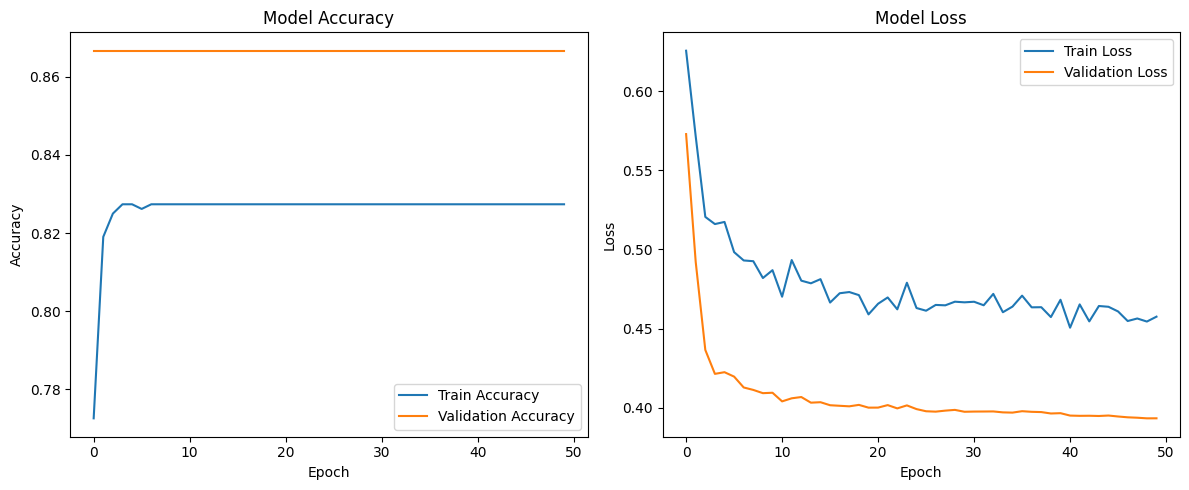

In [ ]:
plot_training_history(training)

# Fine-Tuning

In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Wrap the `nn_train` function with KerasClassifier for grid search
model = KerasClassifier(model=nn_train, verbose=0)

# Define parameter grid for batch size and epochs
batch_size = [20, 30, 60]  # Adjusting batch sizes
epochs = [30, 50, 60]  # Adjusting number of epochs
param_grid = dict(batch_size=batch_size, epochs=epochs)

# Perform grid search using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, verbose=2)
grid_result_batch = grid_search.fit(X_train, y_train)

# Display best parameters and their corresponding score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] END ...........................batch_size=20, epochs=30; total time=   8.7s
[CV] END ...........................batch_size=20, epochs=30; total time=   5.5s


[CV] END ...........................batch_size=20, epochs=30; total time=   5.9s


[CV] END ...........................batch_size=20, epochs=30; total time=   6.4s
[CV] END ...........................batch_size=20, epochs=30; total time=   5.4s
[CV] END ...........................batch_size=20, epochs=30; total time=   6.3s
[CV] END ...........................batch_size=20, epochs=30; total time=   5.4s
[CV] END ...........................batch_size=20, epochs=30; total time=   5.8s
[CV] END ...........................batch_size=20, epochs=30; total time=   6.6s
[CV] END ...........................batch_size=20, epochs=30; total time=   5.7s
[CV] END ...........................batch_size=20, epochs=50; total time=   9.0s
[CV] END ...........................batch_size=20, epochs=50; total time=   8.8s
[CV] END ...........................batch_size=20, epochs=50; total time=   8.7s
[CV] END ...........................batch_size=20, epochs=50; total time=   8.6s
[CV] END ...........................batch_size=20, epochs=50; total time=   8.3s
[CV] END ...................

In [ ]:
# Summarize grid search results
print(f"Best parameters: {grid_result_batch.best_params_}")
print(f"Best cross-validation accuracy: {grid_result_batch.best_score_:.2f}")

# Extract and display the mean accuracy, standard deviation, and corresponding parameters
means = grid_result_batch.cv_results_['mean_test_score']
stds = grid_result_batch.cv_results_['std_test_score']
params = grid_result_batch.cv_results_['params']

print("\nDetailed results for all grid search combinations:")
for mean, stdev, param in zip(means, stds, params):
    print(f"Mean Accuracy: {mean:.4f} (Std Dev: {stdev:.4f}) with Parameters: {param}")

Best parameters: {'batch_size': 20, 'epochs': 30}
Best cross-validation accuracy: 0.84

Detailed results for all grid search combinations:
Mean Accuracy: 0.8352 (Std Dev: 0.0044) with Parameters: {'batch_size': 20, 'epochs': 30}
Mean Accuracy: 0.8352 (Std Dev: 0.0044) with Parameters: {'batch_size': 20, 'epochs': 50}
Mean Accuracy: 0.8352 (Std Dev: 0.0074) with Parameters: {'batch_size': 20, 'epochs': 60}
Mean Accuracy: 0.8352 (Std Dev: 0.0044) with Parameters: {'batch_size': 30, 'epochs': 30}
Mean Accuracy: 0.8352 (Std Dev: 0.0044) with Parameters: {'batch_size': 30, 'epochs': 50}
Mean Accuracy: 0.8352 (Std Dev: 0.0044) with Parameters: {'batch_size': 30, 'epochs': 60}
Mean Accuracy: 0.8352 (Std Dev: 0.0044) with Parameters: {'batch_size': 60, 'epochs': 30}
Mean Accuracy: 0.8352 (Std Dev: 0.0044) with Parameters: {'batch_size': 60, 'epochs': 50}
Mean Accuracy: 0.8352 (Std Dev: 0.0044) with Parameters: {'batch_size': 60, 'epochs': 60}


In [ ]:
# Define the model wrapped in KerasClassifier for GridSearchCV
model = KerasClassifier(
    model=nn_train,         # Use the `nn_train` function
    epochs=30,              # Use the best epochs determined earlier
    batch_size=20,          # Use the best batch size determined earlier
    verbose=0               # Suppress verbose output during training
)

# Define the grid search parameters
param_grid = {
    'model__num_layers': [2, 3, 4],   # Test different numbers of hidden layers
    'model__num_neurons': [8, 16, 22] # Test different numbers of neurons per layer
}

# Perform grid search using 3-fold cross-validation
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, verbose=2)

# Fit the grid search to the training data
grid_result_layer = grid.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] END ..........model__num_layers=2, model__num_neurons=8; total time=   7.8s
[CV] END ..........model__num_layers=2, model__num_neurons=8; total time=   6.6s
[CV] END ..........model__num_layers=2, model__num_neurons=8; total time=   7.4s
[CV] END ..........model__num_layers=2, model__num_neurons=8; total time=   6.7s
[CV] END ..........model__num_layers=2, model__num_neurons=8; total time=   7.7s
[CV] END ..........model__num_layers=2, model__num_neurons=8; total time=   6.6s
[CV] END ..........model__num_layers=2, model__num_neurons=8; total time=   7.7s
[CV] END ..........model__num_layers=2, model__num_neurons=8; total time=   6.4s
[CV] END ..........model__num_layers=2, model__num_neurons=8; total time=   7.8s
[CV] END ..........model__num_layers=2, model__num_neurons=8; total time=   6.6s
[CV] END .........model__num_layers=2, model__num_neurons=16; total time=   7.5s
[CV] END .........model__num_layers=2, model__nu

In [ ]:
# Summarize Grid Search Results
print("Best Parameters Found:")
print(f"  Number of Layers: {grid_result_layer.best_params_['model__num_layers']}")
print(f"  Number of Neurons: {grid_result_layer.best_params_['model__num_neurons']}")
print(f"Best Cross-Validation Accuracy: {grid_result_layer.best_score_:.4f}\n")

# Loop through all grid search results
print("Detailed Cross-Validation Results:")
means = grid_result_layer.cv_results_['mean_test_score']
stds = grid_result_layer.cv_results_['std_test_score']
params = grid_result_layer.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"Accuracy: {mean:.4f} (±{stdev:.4f}) with Parameters: {param}")

Best Parameters Found:
  Number of Layers: 2
  Number of Neurons: 8
Best Cross-Validation Accuracy: 0.8352

Detailed Cross-Validation Results:
Accuracy: 0.8352 (±0.0044) with Parameters: {'model__num_layers': 2, 'model__num_neurons': 8}
Accuracy: 0.8333 (±0.0064) with Parameters: {'model__num_layers': 2, 'model__num_neurons': 16}
Accuracy: 0.8352 (±0.0044) with Parameters: {'model__num_layers': 2, 'model__num_neurons': 22}
Accuracy: 0.8352 (±0.0044) with Parameters: {'model__num_layers': 3, 'model__num_neurons': 8}
Accuracy: 0.8314 (±0.0096) with Parameters: {'model__num_layers': 3, 'model__num_neurons': 16}
Accuracy: 0.8324 (±0.0076) with Parameters: {'model__num_layers': 3, 'model__num_neurons': 22}
Accuracy: 0.8352 (±0.0044) with Parameters: {'model__num_layers': 4, 'model__num_neurons': 8}
Accuracy: 0.8295 (±0.0079) with Parameters: {'model__num_layers': 4, 'model__num_neurons': 16}
Accuracy: 0.8333 (±0.0106) with Parameters: {'model__num_layers': 4, 'model__num_neurons': 22}


In [ ]:
# Define the KerasClassifier with the `dropout_rate` parameter
model = KerasClassifier(
    model=nn_train,
    num_layers=2,  # Fixed number of layers for this grid search
    num_neurons=8,  # Fixed number of neurons for this grid search
    dropout_rate=None,  # This will be overridden by GridSearchCV
    epochs=30,
    batch_size=20,
    verbose=0
)

# Define the grid search parameters
dropout_rates = [0.0, 0.2, 0.3, 0.5]  # Dropout rates to be tested
param_grid_dropout = dict(model__dropout_rate=dropout_rates)  # Prefix 'model__' to match SciKeras syntax

# Perform grid search with the defined dropout rates
grid_dropout = GridSearchCV(estimator=model, param_grid=param_grid_dropout, cv=10, verbose=2)
grid_result_dropout = grid_dropout.fit(X_train, y_train)

# Get the best dropout rate
best_dropout_rate = grid_result_dropout.best_params_['model__dropout_rate']
print(f"Best Dropout Rate: {best_dropout_rate}")

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV] END ............................model__dropout_rate=0.0; total time=  29.6s
[CV] END ............................model__dropout_rate=0.0; total time=   8.1s
[CV] END ............................model__dropout_rate=0.0; total time=   7.3s
[CV] END ............................model__dropout_rate=0.0; total time=   8.6s
[CV] END ............................model__dropout_rate=0.0; total time=   7.7s
[CV] END ............................model__dropout_rate=0.0; total time=   7.7s
[CV] END ............................model__dropout_rate=0.0; total time=   7.5s
[CV] END ............................model__dropout_rate=0.0; total time=   7.8s
[CV] END ............................model__dropout_rate=0.0; total time=   7.6s
[CV] END ............................model__dropout_rate=0.0; total time=   7.8s
[CV] END ............................model__dropout_rate=0.2; total time=   9.7s
[CV] END ............................model__drop

In [ ]:
# Summarize results
print(f"Best parameters: {grid_result_dropout.best_params_}")
print(f"Best accuracy: {grid_result_dropout.best_score_:.4f}")

# Extracting and printing results for all evaluated candidates
means = grid_result_dropout.cv_results_['mean_test_score']
stds = grid_result_dropout.cv_results_['std_test_score']
params = grid_result_dropout.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"Accuracy: {mean:.4f} (±{stdev:.4f}) with parameters: {param}")

Best parameters: {'model__dropout_rate': 0.0}
Best accuracy: 0.8352
Accuracy: 0.8352 (±0.0044) with parameters: {'model__dropout_rate': 0.0}
Accuracy: 0.8352 (±0.0044) with parameters: {'model__dropout_rate': 0.2}
Accuracy: 0.8352 (±0.0044) with parameters: {'model__dropout_rate': 0.3}
Accuracy: 0.8352 (±0.0044) with parameters: {'model__dropout_rate': 0.5}


In [ ]:
# Create final model
final_model = nn_train(
    num_layers=2,        # Best number of hidden layers
    num_neurons=8,      # Best number of neurons per layer
    opt='adam',          # Optimizer
    dropout_rate=0.0,    # Optimal dropout rate
    seed_value=42        # Seed for reproducibility
)

# Display the model summary
final_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 249 (996.00 B)

 Trainable params: 249 (996.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the final model
final_training = final_model.fit(
    X_train,
    y_train,
    epochs=30,          # Train for 50 epochs
    batch_size=20,      # Batch size optimized from earlier experiments
    validation_split=0.2,  # Use 20% of the training data for validation
    verbose=2           # Show training progress with per-epoch logs
)

Epoch 1/30
42/42 - 3s - 76ms/step - accuracy: 0.6976 - loss: 0.6537 - val_accuracy: 0.8476 - val_loss: 0.5860
Epoch 2/30
42/42 - 0s - 9ms/step - accuracy: 0.8226 - loss: 0.5633 - val_accuracy: 0.8667 - val_loss: 0.4919
Epoch 3/30
42/42 - 1s - 15ms/step - accuracy: 0.8262 - loss: 0.5001 - val_accuracy: 0.8667 - val_loss: 0.4287
Epoch 4/30
42/42 - 1s - 14ms/step - accuracy: 0.8274 - loss: 0.4703 - val_accuracy: 0.8667 - val_loss: 0.4041
Epoch 5/30
42/42 - 1s - 15ms/step - accuracy: 0.8274 - loss: 0.4627 - val_accuracy: 0.8667 - val_loss: 0.3974
Epoch 6/30
42/42 - 1s - 15ms/step - accuracy: 0.8274 - loss: 0.4604 - val_accuracy: 0.8667 - val_loss: 0.3953
Epoch 7/30
42/42 - 1s - 13ms/step - accuracy: 0.8274 - loss: 0.4590 - val_accuracy: 0.8667 - val_loss: 0.3944
Epoch 8/30
42/42 - 0s - 6ms/step - accuracy: 0.8274 - loss: 0.4579 - val_accuracy: 0.8667 - val_loss: 0.3940
Epoch 9/30
42/42 - 0s - 5ms/step - accuracy: 0.8274 - loss: 0.4568 - val_accuracy: 0.8667 - val_loss: 0.3937
Epoch 10/30
4

# Evaluation

In [ ]:
# evaluate the model
validation_accurancy_final = np.mean(final_training.history['val_accuracy'])
print("\n%s: %.2f%%" % ('validation_accurancy_final', validation_accurancy_final*100))
print("\n%s: %.2f%%" % ('validation_accurancy_previous', validation_accurancy*100))


validation_accurancy_final: 86.60%

validation_accurancy_previous: 86.67%


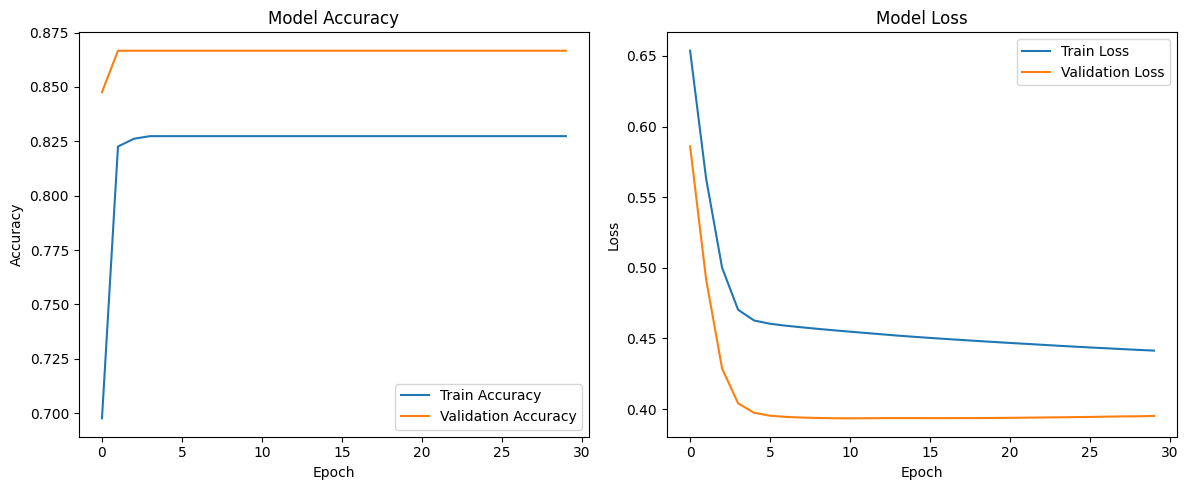

In [ ]:
plot_training_history(final_training)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the model on the test data
test_loss, test_accuracy = final_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Make predictions on the test data
y_pred = final_model.predict(X_test)

Test Loss: 0.4561891555786133
Test Accuracy: 83.11%
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [ ]:
y_pred

array([[0.8493484 ],
       [0.7221902 ],
       [0.819826  ],
       [0.78400445],
       [0.79596627],
       [0.87520015],
       [0.8476314 ],
       [0.65583646],
       [0.86438984],
       [0.81595236],
       [0.8115686 ],
       [0.7756131 ],
       [0.7084396 ],
       [0.8415703 ],
       [0.80603856],
       [0.89075744],
       [0.8485547 ],
       [0.85166395],
       [0.74056584],
       [0.82333416],
       [0.814616  ],
       [0.7593789 ],
       [0.8287594 ],
       [0.9131613 ],
       [0.8552131 ],
       [0.8890041 ],
       [0.8448825 ],
       [0.75521475],
       [0.82314247],
       [0.8230889 ],
       [0.7646032 ],
       [0.8181307 ],
       [0.84396106],
       [0.85142064],
       [0.8279085 ],
       [0.81210643],
       [0.79870564],
       [0.8620661 ],
       [0.8517961 ],
       [0.8735397 ],
       [0.7883557 ],
       [0.8076375 ],
       [0.7880391 ],
       [0.8229931 ],
       [0.83665365],
       [0.7329775 ],
       [0.9050154 ],
       [0.830

In [ ]:
# Ensure validation_accuracy_final is defined
validation_accuracy_final = np.mean(final_training.history['val_accuracy'])

# Convert probabilities to binary class labels
y_pred_classes = (y_pred > 0.5).astype(int)

# Create a DataFrame for evaluation metrics
evaluation_metrics = pd.DataFrame({
    "Evaluation Metric": ["Validation Accuracy (Train)", "Test Accuracy", "Recall", "Precision", "F1 Score"],
    "Value": [
        validation_accuracy_final * 100,
        accuracy_score(y_test, y_pred_classes) * 100,
        recall_score(y_test, y_pred_classes) * 100,
        precision_score(y_test, y_pred_classes) * 100,
        f1_score(y_test, y_pred_classes) * 100
    ]
})

# Display the DataFrame
display(evaluation_metrics)

,Evaluation Metric,Value
0,Validation Accuracy (Train),86.603175
1,Test Accuracy,83.111111
2,Recall,100.000000
3,Precision,83.111111
4,F1 Score,90.776699


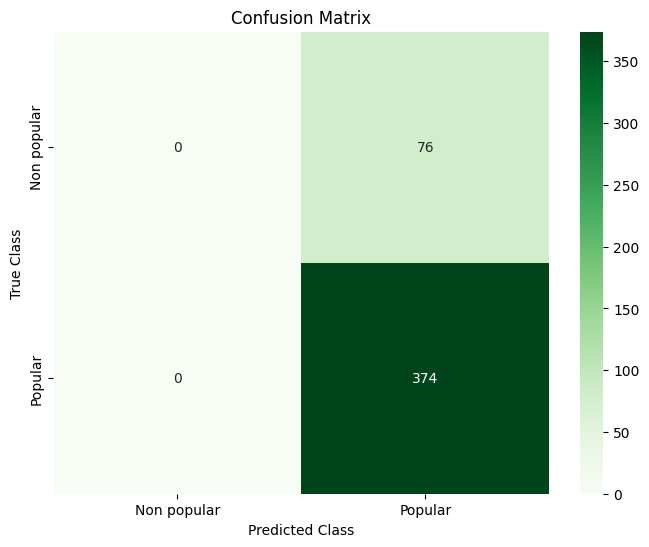

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert probabilities to binary class labels
y_pred_classes = (y_pred > 0.5).astype(int)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))  # Adjust figure size here
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Non popular', 'Popular'], yticklabels=['Non popular', 'Popular'])
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
X

,song_name_len,duration_ms,explicit,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,pop,rock,hiphop,dance,folk,rnb,latin
0,22.0,211160.0,0,0.751,0.834,1.0,-5.444,0.0437,0.3000,0.000018,0.3550,0.894,95.053,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20.0,167066.0,0,0.434,0.897,0.0,-4.918,0.0488,0.0103,0.000000,0.6120,0.684,148.726,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,7.0,250546.0,0,0.529,0.496,7.0,-9.007,0.0290,0.1730,0.000000,0.2510,0.278,136.859,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12.0,224493.0,0,0.551,0.913,0.0,-4.063,0.0466,0.0263,0.000013,0.3470,0.544,119.992,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,11.0,200560.0,0,0.614,0.928,8.0,-4.806,0.0516,0.0408,0.001040,0.0845,0.879,172.656,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,31.0,185640.0,0,0.787,0.848,1.0,-4.696,0.0549,0.0915,0.000000,0.1500,0.947,121.989,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1496,16.0,192670.0,0,0.688,0.841,2.0,-5.217,0.1790,0.2040,0.000295,0.2290,0.743,133.912,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1497,8.0,217306.0,0,0.627,0.703,0.0,-4.884,0.2360,0.5630,0.000000,0.0962,0.640,81.897,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1498,11.0,269946.0,1,0.716,0.670,11.0,-5.779,0.1940,0.2510,0.000000,0.1090,0.124,86.010,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Define the revenue and costs
revenue_correct_popular = 1000
cost_false_positive = 500
cost_false_negative = 1200

# Confusion matrix for original decision tree
tn_orig, fp_orig, fn_orig, tp_orig = confusion_matrix_original.ravel()

# Calculate revenues and costs for original decision tree
revenue_orig = tp_orig * revenue_correct_popular
cost_fp_orig = fp_orig * cost_false_positive
cost_fn_orig = fn_orig * cost_false_negative
net_revenue_orig = revenue_orig - cost_fp_orig - cost_fn_orig

# Confusion matrix for fine-tuned decision tree
tn_tune, fp_tune, fn_tune, tp_tune = confusion_matrix_tuned.ravel()

# Calculate revenues and costs for fine-tuned decision tree
revenue_tune = tp_tune * revenue_correct_popular
cost_fp_tune = fp_tune * cost_false_positive
cost_fn_tune = fn_tune * cost_false_negative
net_revenue_tune = revenue_tune - cost_fp_tune - cost_fn_tune

# Display results in a detailed DataFrame
results_df = pd.DataFrame({
    "Metric": [
        "True Positives (Revenue)",
        "False Positives (Cost)",
        "False Negatives (Cost)",
        "Net Revenue"
    ],
    "Original Decision Tree": [
        f"${tp_orig * revenue_correct_popular:,}",
        f"${fp_orig * cost_false_positive:,}",
        f"${fn_orig * cost_false_negative:,}",
        f"${net_revenue_orig:,}"
    ],
    "Tuned Decision Tree": [
        f"${tp_tune * revenue_correct_popular:,}",
        f"${fp_tune * cost_false_positive:,}",
        f"${fn_tune * cost_false_negative:,}",
        f"${net_revenue_tune:,}"
    ]
})

print("Revenue and Cost Analysis for Decision Trees:")
display(results_df)

,Metric,Value,Formatted
0,True Positives (Revenue),374000,"$374,000"
1,False Positives (Cost),-38000,"$-38,000"
2,False Negatives (Cost),0,$0
3,Net Revenue,336000,"$336,000"


# Monetary Impact Analysis of Neural Network Prediction

In [ ]:
# Define the revenue and costs
revenue_correct_popular = 1000  # Revenue for correctly predicting a popular song
cost_false_positive = 500      # Cost for incorrectly predicting non-popular as popular
cost_false_negative = 1200     # Cost for incorrectly predicting popular as non-popular

# Confusion matrix values from the neural network
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_classes).ravel()

# Calculate revenues and costs for the neural network
revenue_nn = tp * revenue_correct_popular
cost_fp_nn = fp * cost_false_positive
cost_fn_nn = fn * cost_false_negative
net_revenue_nn = revenue_nn - cost_fp_nn - cost_fn_nn

# Create a DataFrame for detailed results
results_df_nn = pd.DataFrame({
    "Metric": [
        "True Positives (Revenue)",
        "False Positives (Cost)",
        "False Negatives (Cost)",
        "Net Revenue"
    ],
    "Neural Network": [
        f"${revenue_nn:,}",  # Revenue
        f"${-cost_fp_nn:,}", # Cost for False Positives
        f"${-cost_fn_nn:,}", # Cost for False Negatives
        f"${net_revenue_nn:,}" # Net Revenue
    ]
})

print("Revenue and Cost Analysis for Neural Network:")
display(results_df_nn)

Revenue and Cost Analysis for Neural Network:


,Metric,Neural Network
0,True Positives (Revenue),"$374,000"
1,False Positives (Cost),"$-38,000"
2,False Negatives (Cost),$0
3,Net Revenue,"$336,000"


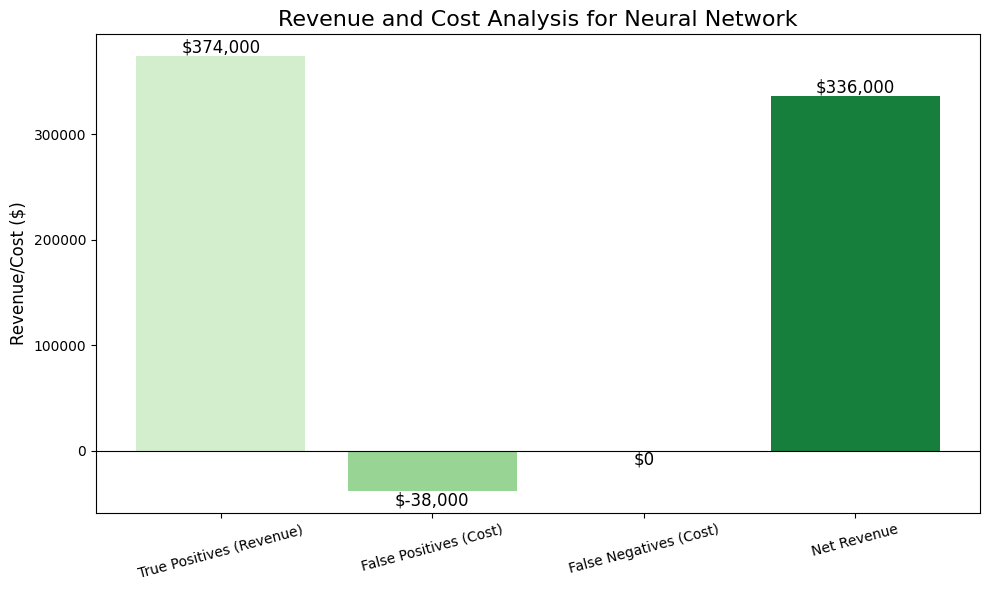

In [ ]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create bar chart
plt.figure(figsize=(10, 6))

# Metrics and values
metrics = results_df_nn["Metric"]
values = [revenue_nn, -cost_fp_nn, -cost_fn_nn, net_revenue_nn]

# Green color palette for bars
colors = sns.color_palette("Greens", len(values))

# Plot bars
bars = plt.bar(metrics, values, color=colors)

# Add annotations
for bar, value in zip(bars, values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f"${value:,.0f}",
             ha="center", va="bottom" if height > 0 else "top", fontsize=12)

# Add titles and labels
plt.title("Revenue and Cost Analysis for Neural Network", fontsize=16)
plt.ylabel("Revenue/Cost ($)", fontsize=12)
plt.xticks(rotation=15)
plt.axhline(0, color="black", linewidth=0.8)  # Baseline

# Tight layout for better appearance
plt.tight_layout()
plt.show()